In [1]:
# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu
Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""


'\n@author: Sreenivas Bhattiprolu\nCode tested on Tensorflow: 2.2.0\n    Keras: 2.4.3\ndataset: https://finance.yahoo.com/quote/GE/history/\nAlso try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC\n'

In [2]:


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [3]:
#Read the csv file
#df = pd.read_csv('GE.csv')
df= pd.read_csv('rovi_05.csv')    ### 'rovi_05.csv''zara_02.csv'
print(df.tail()) #7 columns, including the Date. 


            Date  position      Close    EMA_200     EMA_50    EMA_100  \
3625  2022-11-22      3625  40.919998  51.809842  43.252252  47.177992   
3626  2022-11-23      3626  36.759998  51.660092  42.997654  46.971695   
3627  2022-11-24      3627  38.000000  51.524171  42.801668  46.794038   
3628  2022-11-25      3628  37.340000  51.383035  42.587484  46.606829   
3629  2022-11-28      3629  37.099998  51.240915  42.372289  46.418575   

         EMA_30  positionnn Name  
3625  41.601755        3625  IBM  
3626  41.289384        3626  IBM  
3627  41.077166        3627  IBM  
3628  40.836058        3628  IBM  
3629  40.595022        3629  IBM  


In [4]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(5)) #Check last few dates. 

3625   2022-11-22
3626   2022-11-23
3627   2022-11-24
3628   2022-11-25
3629   2022-11-28
Name: Date, dtype: datetime64[ns]


In [5]:
df.shape

(3630, 9)

In [6]:
#Variables for training
cols = list(df)[2:7]  #df.columns.tolist()
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['Close', 'EMA_200', 'EMA_50', 'EMA_100', 'EMA_30']


In [7]:
cols[0]

'Close'

<AxesSubplot:>

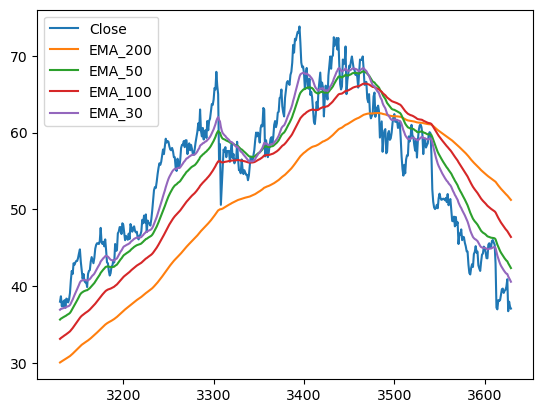

In [8]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

df_for_plot=df_for_training.tail(500)
df_for_plot.plot.line()

In [9]:
### ESTUDIA como funciona este tema del scaler... deberia ser entre 0 y 1, no?

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
#Estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled


array([[-0.5886418 , -0.48379332, -0.52553775, -0.50860345, -0.52986149],
       [-0.59528172, -0.48471151, -0.52801872, -0.51008037, -0.53383755],
       [-0.57536207, -0.4854036 , -0.52961178, -0.51112071, -0.53626369],
       ...,
       [ 1.20895604,  2.29261653,  1.53062475,  1.82810745,  1.41129835],
       [ 1.16911674,  2.28329065,  1.51753961,  1.81643816,  1.39665083],
       [ 1.15462962,  2.27389977,  1.50439262,  1.8047037 ,  1.38200764]])

In [10]:
df_for_training_scaled.shape


(3630, 5)

## separar Training y TEST

In [11]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 6   # origina=1,   Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.  FILAS

In [12]:

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    ## en este caso Append añade un elemento que es un array de dos dimensiones.
    trainX.append( df_for_training_scaled[ i - n_past : i ,  0:df_for_training.shape[1]])  #n_past filas X 5 columnas (feautures)
    #slicing: fila desde (i-n_past) hasta i///// Columna desde 0: 5 =>(df_for_training.shape[1])
    
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])  ##[17:18,0] un posicoin de la fila para la columna 0
    ### el 4 es la caracteritica elegida Close//EMA//EMA100//


trainX, trainX_test, trainY, trainY_test  = train_test_split(trainXX, trainYY, test_size = 0.30,shuffle = False)




##X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [14]:

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

"""
tenemos un array de 238 elementos en el que cada elemento es un array de 14x5
"""

trainX shape == (3611, 14, 5).
trainY shape == (3611, 1).


'\ntenemos un array de 238 elementos en el que cada elemento es un array de 14x5\n'

In [ ]:
trainX[0][13][4]

In [15]:
trainY[0][0]

-0.6037386959937655

In [16]:

#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
103/103 [==============================] - 12s 37ms/step - loss: 0.0409 - val_loss: 12.5854
Epoch 2/20
103/103 [==============================] - 3s 24ms/step - loss: 0.0098

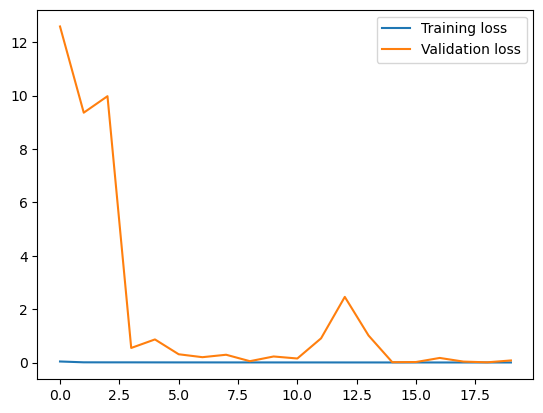

In [17]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=20, batch_size=30, validation_split=0.15, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [18]:

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
#from pandas.tseries.holiday import USFederalHolidayCalendar
#from pandas.tseries.offsets import CustomBusinessDay

#us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.


##n_days_for_prediction=10  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_past, freq='D').tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[0:n_past])
#prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
                                                            # desde -n hasta el final. Cada elemento es un array bidimensional
#Pido una predcicion para un array de fechas, me devuelve la predicion para cada una

#Nos vamos n_daysforPredcition atras y calculamos la precidion a n_future (6) days despues.

[Timestamp('2022-11-09 00:00:00', freq='D'), Timestamp('2022-11-10 00:00:00', freq='D'), Timestamp('2022-11-11 00:00:00', freq='D'), Timestamp('2022-11-12 00:00:00', freq='D'), Timestamp('2022-11-13 00:00:00', freq='D'), Timestamp('2022-11-14 00:00:00', freq='D'), Timestamp('2022-11-15 00:00:00', freq='D'), Timestamp('2022-11-16 00:00:00', freq='D'), Timestamp('2022-11-17 00:00:00', freq='D'), Timestamp('2022-11-18 00:00:00', freq='D'), Timestamp('2022-11-19 00:00:00', freq='D'), Timestamp('2022-11-20 00:00:00', freq='D'), Timestamp('2022-11-21 00:00:00', freq='D'), Timestamp('2022-11-22 00:00:00', freq='D')]
1/1 [==============================] - 1s 968ms/step


In [19]:
#print (trainX[-2:])  # dos ultimos elementos. Cada elemento es un array de 15x5
print (prediction)

[[-0.57876647]
 [-0.58356696]
 [-0.58918947]
 [-0.5960061 ]
 [-0.60338604]
 [-0.6108415 ]
 [-0.61733747]
 [-0.6236162 ]
 [-0.6299404 ]
 [-0.6359402 ]
 [-0.6416795 ]
 [-0.6477183 ]
 [-0.6538023 ]
 [-0.65992796]]


In [20]:
trainY[-n_past+n_future:]

array([[1.46242272],
       [1.45309958],
       [1.44602408],
       [1.44316771],
       [1.42419083],
       [1.41129835],
       [1.39665083],
       [1.38200764]])

In [21]:
xx=(range(n_past))

pred= prediction
pred.shape = (n_past)
real=trainY[-n_past:]
real.shape = (n_past)

#sns.lineplot(x=xx, y=pred, color='lightgreen')
#sns.lineplot(x=xx, y=real)

In [22]:
real

array([1.543786  , 1.52396159, 1.50808138, 1.49612607, 1.48525562,
       1.47289162, 1.46242272, 1.45309958, 1.44602408, 1.44316771,
       1.42419083, 1.41129835, 1.39665083, 1.38200764])

In [23]:
pred

array([-0.57876647, -0.58356696, -0.58918947, -0.5960061 , -0.60338604,
       -0.6108415 , -0.61733747, -0.6236162 , -0.6299404 , -0.6359402 ,
       -0.6416795 , -0.6477183 , -0.6538023 , -0.65992796], dtype=float32)

In [24]:
real.shape

(14,)

VISUALIZAION

In [25]:
pred_gap = np.zeros(n_past+n_future)
muestra_gap =[]
xx=[]

muestreo=50
gapmuestras=np.zeros(muestreo-n_past)
gapprevion=np.zeros(n_future)
gappostprevison= np.zeros(muestreo-n_future-n_past)

for ii in range (len(gapmuestras)):
    gapmuestras[ii] = np.nan
for ii in range (len(gapprevion)):
    gapprevion[ii] = np.nan
for ii in range (len(gappostprevison)):
    gappostprevison[ii] = np.nan    


inicio= np.zeros(n_future+n_past)    
##pred_gap=np.concatenate((pred_gap, inicio), axis=0)

origen=n_past+n_future


for i in range(n_past, len(trainX)-100, muestreo):
    
    prediction = model.predict(trainX[i-n_past:i])
    prediction.shape = (n_past)   #me devuleve 15//n_past previsiones a 6//n_future dias vista
    pred_gap=np.concatenate((pred_gap, prediction), axis=0)  #predcicion son n_past... en un futuro de n_futre muestras
    pred_gap=np.concatenate((pred_gap, gapmuestras), axis=0)

    xx=(trainX[i-n_past:i,0,4])
    muestra_gap=np.concatenate((muestra_gap, xx  ), axis=0)
    muestra_gap=np.concatenate((muestra_gap, gapmuestras), axis=0)

    #print(trainX[i:i+n_days_for_prediction])
    ##print(xx)
    #fake =input()


1/1 [==============================] - 0s 44ms/step


In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


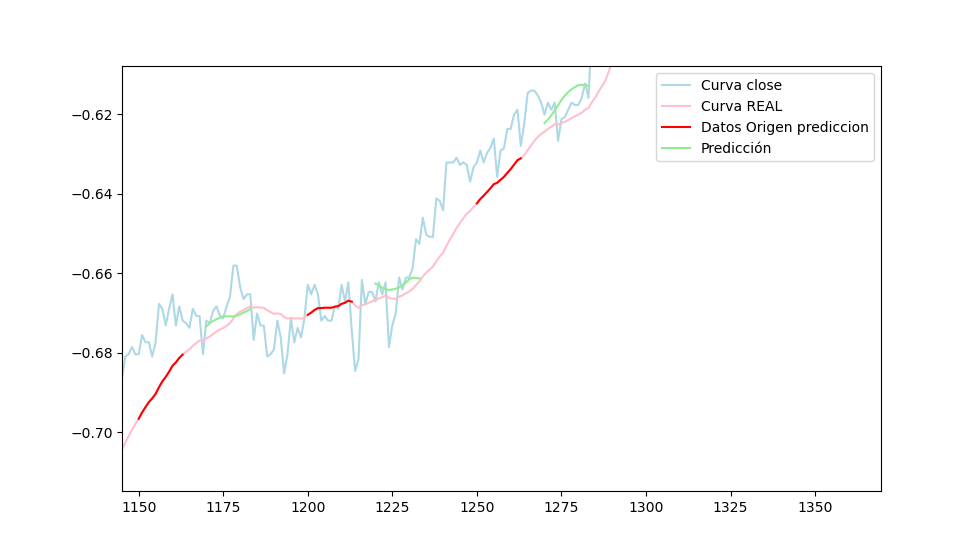

In [39]:
#sns.lineplot(y=pred_gap, color='lightgreen')

yy2y=trainX[0:(len(df_for_training_scaled)),0,0]
#yy2y.shape = (len(df_for_training_scaled[0]) )
plt.plot(yy2y, label='Curva close',color='lightblue')

yyy=trainX[0:(len(df_for_training_scaled)),0,4]
#yyy.shape = (df_for_training_scaled.shape[0] )
plt.plot(yyy, label='Curva REAL',color='pink')

plt.plot(muestra_gap, color='red',label='Datos Origen prediccion')
plt.plot(pred_gap, color='lightgreen', label='Predicción')



plt.legend()
plt.show()

In [ ]:
#sns.lineplot(x=range(pred_gap.size), y=pred_gap, color='lightgreen')
#sns.lineplot(x=range(yy.size), y=yy, color='r')

In [ ]:
plt.savefig('lstm3.jpg',dpi=600)

In [36]:
yy2y.shape


(3611,)